In [5]:
import tensorflow as tf

In [6]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
import datetime

In [8]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('cifar10', as_supervised = True, 
                         with_info = True, batch_size = -1)
dataset_train, dataset_test = dataset['train'], dataset['test']

print(dataset_train[0].shape, dataset_train[1].shape)
print(dataset_test[0].shape, dataset_test[1].shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [9]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# আমাদের পিক্সেল ভ্য়ালুগুলোকে নরমালাইজ করে নিয়ে আসি ০ এবং ১ এর মধ্যে
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2044s 12us/step


In [14]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


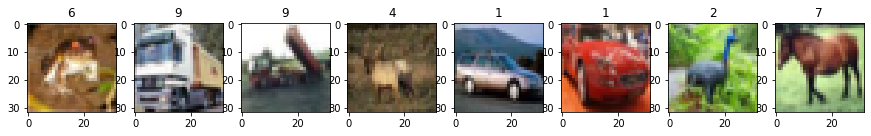

In [15]:
plt.figure(figsize=(15,4))
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i,0])

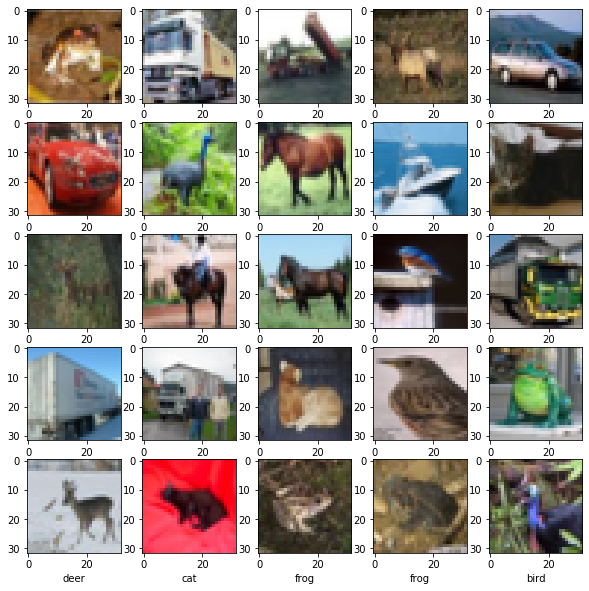

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # সিফারের লেবেলগুলো যেহেতু অ্যারে, সেকারণে আমাদের 
    # বাড়তি ইনডেক্স দরকার পড়ছে
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [24]:
!rm -rf ./logs/

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
log_dir="logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopper = EarlyStopping(monitor='val_accuracy', patience=10)
tensorboard = TensorBoard(log_dir, histogram_freq=1)
# এখানে আমরা মডেল চেকপয়েন্টারে স্টোর হচ্ছে hdf5 ফরম্যাটে, 
# সামনে আমরা দেখবো মডেলকে যখন স্টোর করে রাখবো
checkpointer = ModelCheckpoint(log_dir+'weights_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.hdf5',
                               monitor='val_acc')

# model.fit(x=train_images, 
#         y=train_labels, 
#         epochs=5, 
#         validation_data=(test_images, test_labels), 
#         callbacks=[tensorboard_callback])

model.fit(train_images, train_labels,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 42s 924us/sample - loss: 1.6790 - accuracy: 0.3859 - val_loss: 1.4343 - val_accuracy: 0.4894
Epoch 2/10
45000/45000 [==============================] - 43s 955us/sample - loss: 1.3227 - accuracy: 0.5268 - val_loss: 1.2453 - val_accuracy: 0.5570
Epoch 3/10
45000/45000 [==============================] - 40s 891us/sample - loss: 1.1588 - accuracy: 0.5886 - val_loss: 1.1365 - val_accuracy: 0.5928
Epoch 4/10
45000/45000 [==============================] - 40s 880us/sample - loss: 1.0535 - accuracy: 0.6282 - val_loss: 1.0270 - val_accuracy: 0.6416
Epoch 5/10
45000/45000 [==============================] - 40s 889us/sample - loss: 0.9730 - accuracy: 0.6579 - val_loss: 1.0193 - val_accuracy: 0.6450
Epoch 6/10
45000/45000 [==============================] - 40s 897us/sample - loss: 0.9255 - accuracy: 0.6763 - val_loss: 0.9291 - val_accuracy: 0.6758
Epoch 7/10
45000/45000 [=====================